In [1]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [2]:
boston = load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
X.shape, y.shape

((506, 13), (506,))

In [5]:
y_low_idx = np.where(y<=15)[0]

In [6]:
y_medium_idx = np.where((y>15) & (y<=26))[0]

In [7]:
y_high_idx = np.where((y>26) & (y<=37))[0]

In [8]:
y_very_high_idx = np.where(y>37)[0]

In [9]:
y_label = np.array(["" for x in range(len(y))], dtype=object)
y_label[y_low_idx] = "Low"
y_label[y_medium_idx] = "Medium"
y_label[y_high_idx] = "High"
y_label[y_very_high_idx] = "Very High"

In [10]:
Xa = boston["data"]
Xa_std = StandardScaler().fit_transform(Xa)

covariance_matrix = np.cov(Xa_std.T)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

total_var = sum(eig_vals)
explained_var = [(i / total_var) for i in eig_vals]
print(explained_var)



[0.47097344289958942, 0.11015871890111377, 0.095474075855667598, 0.065984532592643225, 0.064197398365859401, 0.050742350853132313, 0.041462884006365976, 0.030503396187010735, 0.0048858097863243351, 0.021341149804512394, 0.01301288011374184, 0.014320298479956903, 0.016943062154082224]


In [11]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

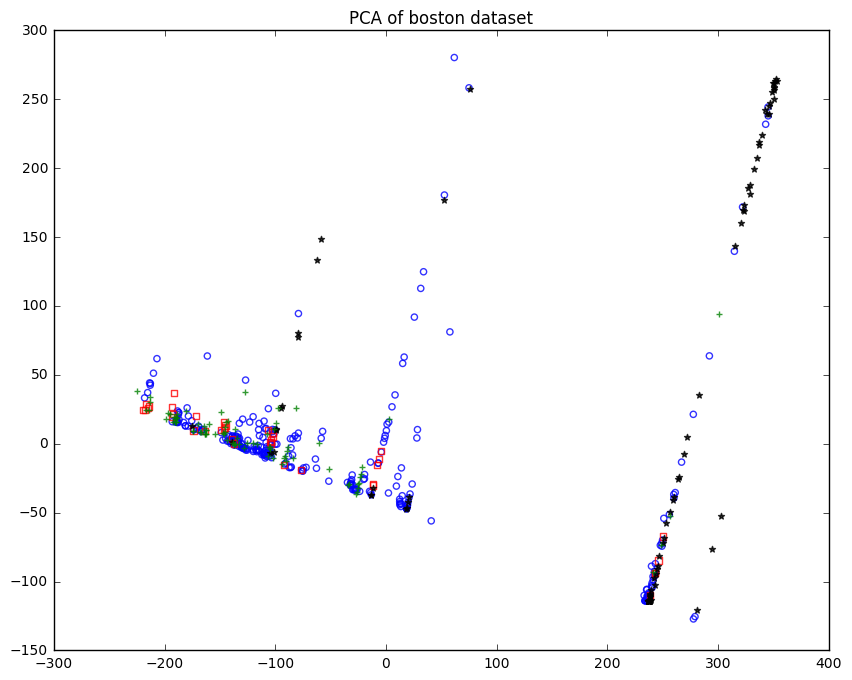

In [12]:

colors_1 = ['blue', 'red']
colors_2 = ['black', 'green']
markers_1 = ['o', 's']
markers_2 = ['*', '+']
lw = 1

plt.figure(figsize=(10, 8), dpi=100)
plt.xlim(-300, 400)
plt.ylim(-150, 300)

for color,marker, level, label_name in zip(colors_1, markers_1, ["Medium","Very High"], y_label):
    plt.scatter(X_r[y_label==level, 0], X_r[y_label==level, 1], edgecolor=color, marker=marker, alpha=0.8, lw=lw,
                label=label_name, facecolors='none')
for color,marker, level, label_name in zip(colors_2, markers_2, ["Low","High"], y_label):
    plt.scatter(X_r[y_label==level, 0], X_r[y_label==level, 1], color=color, marker=marker, alpha=0.8, lw=lw,
                label=label_name)
    
plt.title('PCA of boston dataset')
plt.show()

In [13]:
regr = LinearRegression()

In [14]:
regr.fit(X_r , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_pred = regr.predict(X_r)

In [16]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-0.02548315 -0.00875954]


In [17]:
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))

Mean squared error: 63.92
